In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../d3_mbd_features_data/features/ff_c6.csv")

# Save to a CSV file
molecules = df['Mol'].values


molecules = molecules
molecules


%store -r res
res

[14.133308154469557,
 14.081369567351956,
 14.034265054162482,
 12.926169405830962,
 12.27212198878638,
 3.230739472566894,
 5.121300394981286,
 3.5739198265668453,
 4.715887333726234,
 2.499975609761724,
 1.8052940594169544,
 5.560246204451975,
 17.144355598718082,
 25.02717771580682,
 22.814559268959076,
 25.719392847659723,
 10.553895436793855,
 15.857470042410599,
 1.096295429346349,
 3.966428089692199]

In [4]:
# Add the 'res' list as a new column to the DataFrame

# df['sqrt_Pol_A'] = np.sqrt(df['Pol_A'])
# df['sqrt_Pol_C'] = np.sqrt(df['Pol_C'])
# df['sum_Pol'] =df['Pol_A'] + df['Pol_C']
# df['sqrt_sum_Pol'] = np.sqrt(df['sum_Pol'])

# df['Sum_RadV'] = df['RadV_A'] + df['RadV_C']

# df['sqrt_sum_RadV'] = np.sqrt(df['RadV_A'] + df['RadV_C'])

df['res'] = res
# df.drop(columns=['Mol','f1','f2','f3','f4'])
df = df.drop(columns=['Mol','f1','f2','f3','f4'])
# Compute the correlation matrix
correlation_matrix = df.corr(method='pearson')

# Display the correlation matrix
print(correlation_matrix)

           Pol_C     Pol_A    RadV_C    RadV_A      CN_C      CN_A     Ion_C  \
Pol_C   1.000000 -0.185401  0.851046 -0.472202 -0.028409  0.626462 -0.900411   
Pol_A  -0.185401  1.000000 -0.168638  0.721028  0.477915 -0.733442  0.045091   
RadV_C  0.851046 -0.168638  1.000000 -0.248441  0.006554  0.439194 -0.690912   
RadV_A -0.472202  0.721028 -0.248441  1.000000  0.329897 -0.693893  0.468674   
CN_C   -0.028409  0.477915  0.006554  0.329897  1.000000 -0.522133 -0.054666   
CN_A    0.626462 -0.733442  0.439194 -0.693893 -0.522133  1.000000 -0.553467   
Ion_C  -0.900411  0.045091 -0.690912  0.468674 -0.054666 -0.553467  1.000000   
Ion_A   0.383466 -0.850678  0.262044 -0.778225 -0.681192  0.873191 -0.313109   
EA_C    0.091896 -0.122776  0.012804  0.175191  0.112754  0.299638 -0.168302   
R_C     0.944474 -0.123661  0.930264 -0.354827 -0.029097  0.545547 -0.811847   
R_A    -0.370484  0.685947 -0.252814  0.796924  0.376793 -0.587833  0.305322   
res     0.128220  0.781562 -0.009484  0.

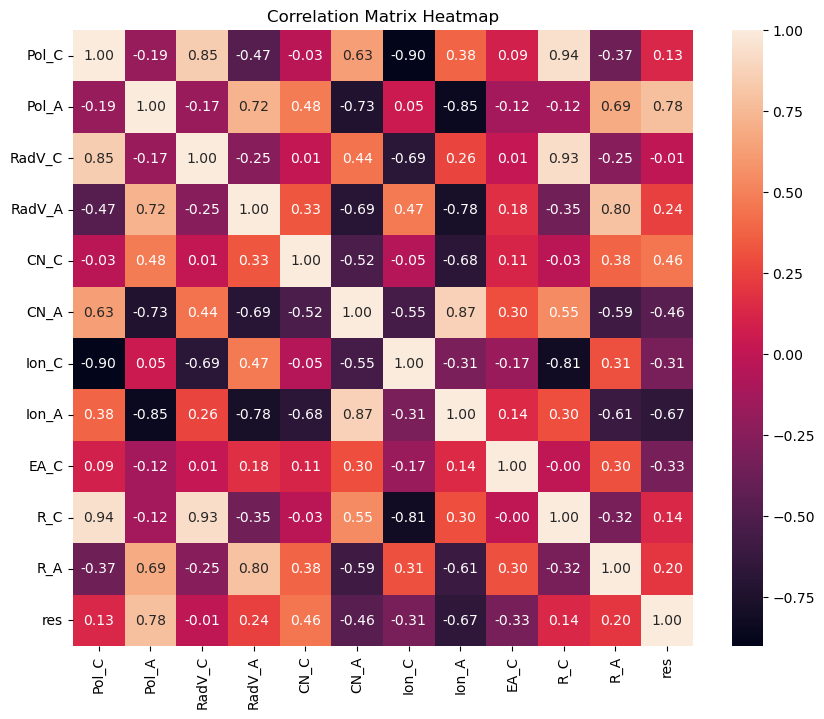

In [5]:
# Create a heatmap of the correlation matrix


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [6]:
# Replace -1 in f3 with values from f1
df['f3'] = df['f3'].where(df['f3'] != -1, df['f1'])

# Replace -1 in f4 with values from f3-
df['f4'] = df['f4'].where(df['f4'] != -1, df['f3'] - 1)

KeyError: 'f3'

In [7]:
df

,Pol_C,Pol_A,RadV_C,RadV_A,CN_C,CN_A,Ion_C,Ion_A,EA_C,R_C,R_A,res
0,164.10,4.51,1.7478,1.0912,6,6,5.3920,13.590,0.7540,1.6000,0.4267,14.133308
1,162.70,4.51,1.8541,1.0912,6,6,5.1390,13.590,0.7540,1.8667,0.4267,14.081370
2,289.70,4.51,2.1206,1.0912,6,6,4.3410,13.590,0.7540,2.3467,0.4267,14.034265
3,319.80,4.51,2.3088,1.0912,6,6,4.1770,13.590,0.7540,2.5200,0.4267,12.926169
4,400.60,4.51,2.5283,1.0912,6,6,3.8490,13.590,0.7540,2.7867,0.4267,12.272122
5,400.60,14.60,2.5283,1.5523,8,8,3.8490,12.960,3.6170,2.7867,1.3200,3.230739
6,164.10,14.60,1.7478,1.5523,6,6,5.3920,12.960,3.6170,1.6000,1.3200,5.121300
7,46.50,32.90,1.6504,1.8690,4,4,7.7260,10.451,3.0590,1.3400,1.0000,3.573920
8,164.10,3.74,1.7478,1.1498,6,6,5.3920,17.423,3.3390,1.6000,1.7600,4.715887
9,38.67,19.40,1.6155,1.6554,4,4,9.3940,10.360,0.0000,1.4530,1.3600,2.499976


In [ ]:
## combintaions of f1 f2 f2 f4
df['f5'] = df['f1'] + df['f2']
df['f6'] = df['f3'] + df['f4']
df['f7'] = abs(df['f1'] - df['f2'])
df['f8'] = abs(df['f3'] - df['f4'])

df['f9'] = df['f1']/df['f2']
df['f10'] = df['f3']/df['f4']

df['f11'] = df['f1']*df['f2']
df['f12'] = df['f3']*df['f4']

df['f13'] = df['f1']**2
df['f14'] = df['f2']**2

df['f15'] = df['f3']**2
df['f16'] = df['f4']**2

df['f17'] = 1/df['f9']
df['f18'] = 1/df['f10']


# df['ratio_cat'] = df['f1']/df['f2']
# df['ratio_an'] = df['f3']/df['f4']

df = df[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18']]
df['res'] = res

C:\Users\user\AppData\Local\Temp\ipykernel_14640\3390257626.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res'] = res


In [8]:
correlation_matrix = df.corr()


In [9]:
df

,Pol_C,Pol_A,RadV_C,RadV_A,CN_C,CN_A,Ion_C,Ion_A,EA_C,R_C,R_A,res
0,164.10,4.51,1.7478,1.0912,6,6,5.3920,13.590,0.7540,1.6000,0.4267,14.133308
1,162.70,4.51,1.8541,1.0912,6,6,5.1390,13.590,0.7540,1.8667,0.4267,14.081370
2,289.70,4.51,2.1206,1.0912,6,6,4.3410,13.590,0.7540,2.3467,0.4267,14.034265
3,319.80,4.51,2.3088,1.0912,6,6,4.1770,13.590,0.7540,2.5200,0.4267,12.926169
4,400.60,4.51,2.5283,1.0912,6,6,3.8490,13.590,0.7540,2.7867,0.4267,12.272122
5,400.60,14.60,2.5283,1.5523,8,8,3.8490,12.960,3.6170,2.7867,1.3200,3.230739
6,164.10,14.60,1.7478,1.5523,6,6,5.3920,12.960,3.6170,1.6000,1.3200,5.121300
7,46.50,32.90,1.6504,1.8690,4,4,7.7260,10.451,3.0590,1.3400,1.0000,3.573920
8,164.10,3.74,1.7478,1.1498,6,6,5.3920,17.423,3.3390,1.6000,1.7600,4.715887
9,38.67,19.40,1.6155,1.6554,4,4,9.3940,10.360,0.0000,1.4530,1.3600,2.499976


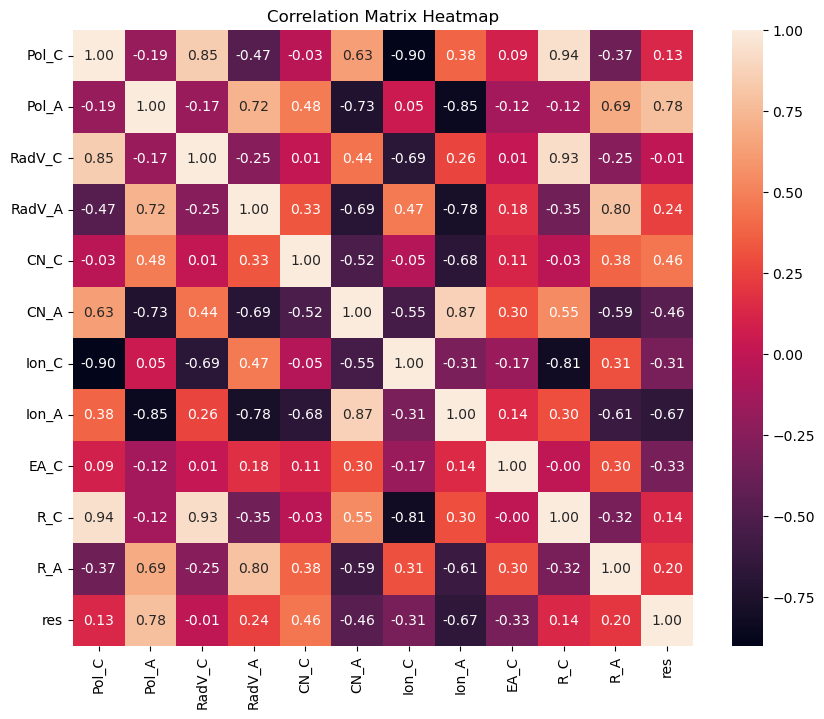

In [10]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("../d3_mbd_features_data/features/ff_c6.csv")

In [13]:
df

,Mol,Pol_C,Pol_A,RadV_C,RadV_A,CN_C,CN_A,Ion_C,Ion_A,EA_C,f1,f2,f3,f4,R_C,R_A
0,LiH,164.10,4.51,1.7478,1.0912,6,6,5.3920,13.590,0.7540,1163.0000,85.3197,7.5916,3.0000,1.6000,0.4267
1,NaH,162.70,4.51,1.8541,1.0912,6,6,5.1390,13.590,0.7540,1608.0000,186.1052,7.5916,3.0000,1.8667,0.4267
2,KH,289.70,4.51,2.1206,1.0912,6,6,4.3410,13.590,0.7540,4984.5000,338.0207,7.5916,3.0000,2.3467,0.4267
3,RbH,319.80,4.51,2.3088,1.0912,6,6,4.1770,13.590,0.7540,6138.7755,476.2591,7.5916,3.0000,2.5200,0.4267
4,CsH,400.60,4.51,2.5283,1.0912,6,6,3.8490,13.590,0.7540,9330.7298,649.0924,7.5916,3.0000,2.7867,0.4267
5,CsCl,400.60,14.60,2.5283,1.5523,8,8,3.8490,12.960,3.6170,9330.7298,649.0924,92.3460,90.3985,2.7867,1.3200
6,LiCl,164.10,14.60,1.7478,1.5523,6,6,5.3920,12.960,3.6170,1163.0000,85.3197,92.3460,90.3985,1.6000,1.3200
7,CuI,46.50,32.90,1.6504,1.8690,4,4,7.7260,10.451,3.0590,337.1808,174.9900,351.9667,358.4995,1.3400,1.0000
8,LiF,164.10,3.74,1.7478,1.1498,6,6,5.3920,17.423,3.3390,1163.0000,85.3197,9.6900,7.1341,1.6000,1.7600
9,ZnS,38.67,19.40,1.6155,1.6554,4,4,9.3940,10.360,0.0000,340.5213,153.4500,134.0060,125.8100,1.4530,1.3600


In [14]:
df['prop'] = -np.power((df['f1']+df['f2'])/2*(df['f3']+df['f4'])/2,1/2)/np.power(df['R_C']+df['R_A'],6)*10

In [15]:
df

,Mol,Pol_C,Pol_A,RadV_C,RadV_A,CN_C,CN_A,Ion_C,Ion_A,EA_C,f1,f2,f3,f4,R_C,R_A,prop
0,LiH,164.10,4.51,1.7478,1.0912,6,6,5.3920,13.590,0.7540,1163.0000,85.3197,7.5916,3.0000,1.6000,0.4267,-8.296156
1,NaH,162.70,4.51,1.8541,1.0912,6,6,5.1390,13.590,0.7540,1608.0000,186.1052,7.5916,3.0000,1.8667,0.4267,-4.736918
2,KH,289.70,4.51,2.1206,1.0912,6,6,4.3410,13.590,0.7540,4984.5000,338.0207,7.5916,3.0000,2.3467,0.4267,-2.608762
3,RbH,319.80,4.51,2.3088,1.0912,6,6,4.1770,13.590,0.7540,6138.7755,476.2591,7.5916,3.0000,2.5200,0.4267,-2.021628
4,CsH,400.60,4.51,2.5283,1.0912,6,6,3.8490,13.590,0.7540,9330.7298,649.0924,7.5916,3.0000,2.7867,0.4267,-1.476466
5,CsCl,400.60,14.60,2.5283,1.5523,8,8,3.8490,12.960,3.6170,9330.7298,649.0924,92.3460,90.3985,2.7867,1.3200,-1.407653
6,LiCl,164.10,14.60,1.7478,1.5523,6,6,5.3920,12.960,3.6170,1163.0000,85.3197,92.3460,90.3985,1.6000,1.3200,-3.852636
7,CuI,46.50,32.90,1.6504,1.8690,4,4,7.7260,10.451,3.0590,337.1808,174.9900,351.9667,358.4995,1.3400,1.0000,-18.371896
8,LiF,164.10,3.74,1.7478,1.1498,6,6,5.3920,17.423,3.3390,1163.0000,85.3197,9.6900,7.1341,1.6000,1.7600,-0.503574
9,ZnS,38.67,19.40,1.6155,1.6554,4,4,9.3940,10.360,0.0000,340.5213,153.4500,134.0060,125.8100,1.4530,1.3600,-3.615226


In [22]:
df = pd.read_csv("../d3_mbd_features_data/features/cc_all2.csv")

df.drop(columns=['CN_C','CN_A','EA_C','R_C','R_A','CHG_C','CHG_A','VEN_C','VEN_A'], inplace=True)
cor_mat = df.iloc[:,1:].corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Result'),
  Text(0, 1.5, 'Pol_C'),
  Text(0, 2.5, 'Pol_A'),
  Text(0, 3.5, 'RadV_C'),
  Text(0, 4.5, 'RadV_A'),
  Text(0, 5.5, 'Ion_C'),
  Text(0, 6.5, 'Ion_A'),
  Text(0, 7.5, 'EN_C'),
  Text(0, 8.5, 'EN_A')])

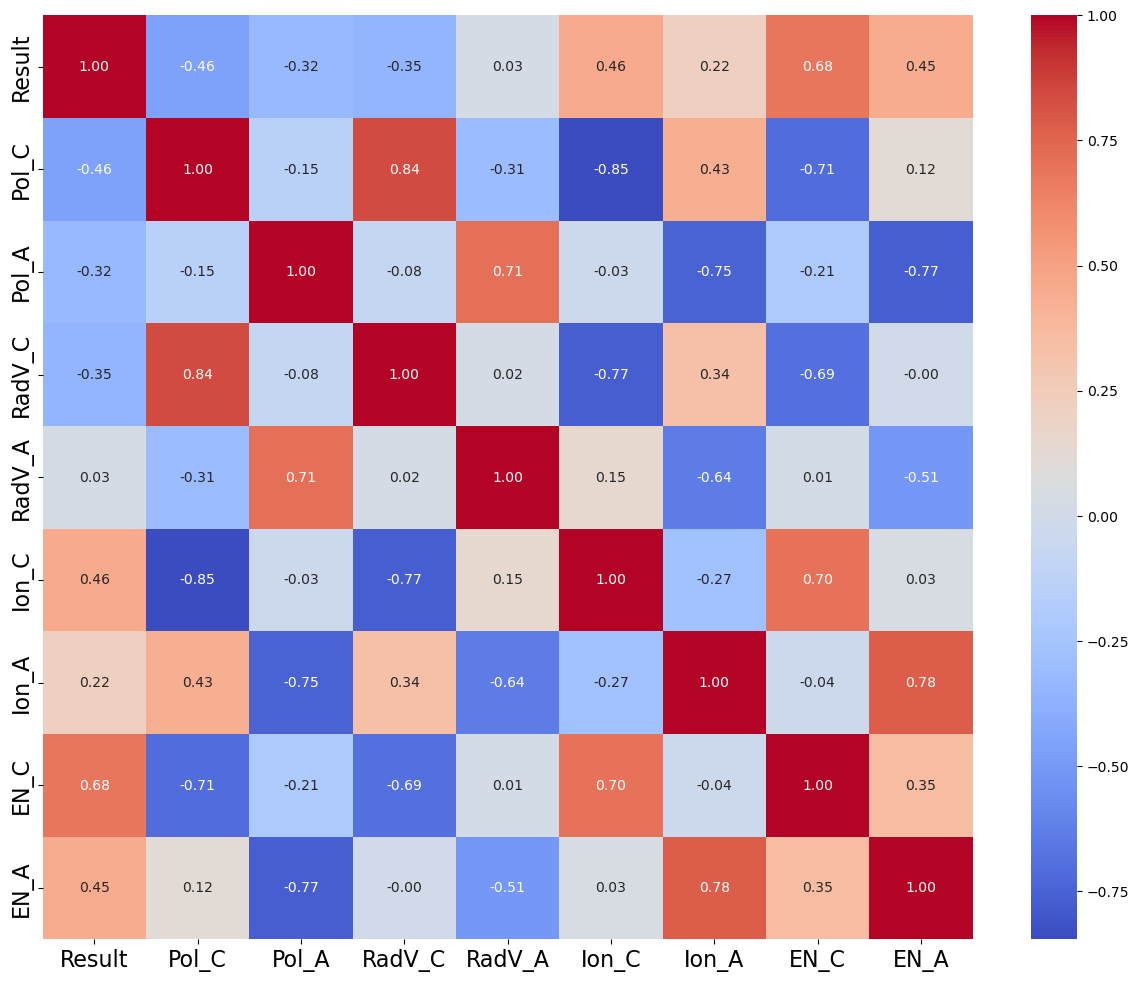

In [24]:
plt.figure(figsize=(15, 12))
sns.heatmap(cor_mat, annot=True, fmt=".2f", cmap='coolwarm')
# increase font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
# Set a threshold for high correlation
threshold = 0.7

# Find pairs with correlation above the threshold
high_corr_pairs = cor_mat.unstack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature1'] != high_corr_pairs['Feature2']]  # Exclude self-correlation
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > threshold]

# Display the pairs
print(high_corr_pairs)

    Feature1 Feature2  Correlation
21     Pol_C   RadV_C     0.839413
28     Pol_C      R_C     0.891222
40     Pol_A   RadV_A     0.711413
55    RadV_C    Pol_C     0.839413
64    RadV_C      R_C     0.764967
74    RadV_A    Pol_A     0.711413
96      CN_C     CN_A     0.823316
113     CN_A     CN_C     0.823316
125     CN_A    CHG_A     0.799917
157    Ion_A     EN_A     0.780507
181      R_C    Pol_C     0.891222
183      R_C   RadV_C     0.764967
242     EN_A    Ion_A     0.780507
267    VEN_C    VEN_A     0.841433
284    VEN_A    VEN_C     0.841433
312    CHG_A     CN_A     0.799917
